In [5]:
#IMPORT LIBRARIES (RUN FIRST)
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


In [6]:
#Check folders
import os
os.getcwd()


'D:\\Desktop\\ITVedant\\PYTHON MODULE\\Project'

In [7]:
#Set correct working directory
os.chdir(r"D:\Desktop\ITVedant\PYTHON MODULE\Project")

In [8]:
#Check files
os.listdir()

['brand_analysis.csv',
 'brand_analysis.png',
 'cleaned_flipkart_mobiles.csv',
 'data',
 'Flipkart_Mobile_Analytics.ipynb',
 'price_distribution.png',
 'price_range_pie.png',
 'top_10_recommended_mobiles.csv',
 'top_brands.png',
 'top_recommendations.csv']

In [9]:
os.listdir("data")

['Flipkart_Mobiles.csv', 'Flipkart_mobile_brands_scraped_data.csv']

In [10]:
#LOAD BOTH CSV FILES
df_mobiles = pd.read_csv("data/flipkart_mobiles.csv")
df_brand = pd.read_csv("data/flipkart_mobile_brands_scraped_data.csv")
df = df_mobiles.copy()

print("Mobiles Shape:", df_mobiles.shape)
print("Brands Shape:", df_brand.shape)


Mobiles Shape: (3114, 8)
Brands Shape: (2647, 8)


In [48]:
#PREVIEW DATA (SANITY CHECK)
df_mobiles.head()


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [11]:
#PREVIEW DATA (SANITY CHECK)
df_brand.head()


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


In [12]:
#MERGE DATA (SAFE)
df_final = df_mobiles.copy()


In [13]:
#STANDARDIZE COLUMN NAMES
df_final.columns = (
    df_final.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

print(df_final.columns.tolist())


['brand', 'model', 'color', 'memory', 'storage', 'rating', 'selling_price', 'original_price']


In [14]:
# Clean prices
#CLEAN PRICE & RATING DATA
df_final["selling_price"] = (
    df_final["selling_price"]
    .astype(str)
    .str.replace("₹", "")
    .str.replace(",", "")
)

df_final["original_price"] = (
    df_final["original_price"]
    .astype(str)
    .str.replace("₹", "")
    .str.replace(",", "")
)

df_final["selling_price"] = pd.to_numeric(df_final["selling_price"], errors="coerce")
df_final["original_price"] = pd.to_numeric(df_final["original_price"], errors="coerce")

# Clean rating
df_final["rating"] = pd.to_numeric(df_final["rating"], errors="coerce")


In [15]:
#HANDLE MISSING VALUES
df_final = df_final.dropna(subset=["selling_price", "rating"])
df_final.reset_index(drop=True, inplace=True)


In [16]:
#DISCOUNT PERCENTAGE
df_final["discount_percent"] = (
    (df_final["original_price"] - df_final["selling_price"])
    / df_final["original_price"]
) * 100


In [17]:
#PRICE RANGE CLASSIFICATION
def price_range(price):
    if price < 15000:
        return "Budget"
    elif price < 30000:
        return "Mid-Range"
    else:
        return "Premium"

df_final["price_range"] = df_final["selling_price"].apply(price_range)


In [18]:
#VALUE-FOR-MONEY SCORE
df_final["value_score"] = (
    df_final["rating"] * df_final["discount_percent"]
) / df_final["selling_price"]


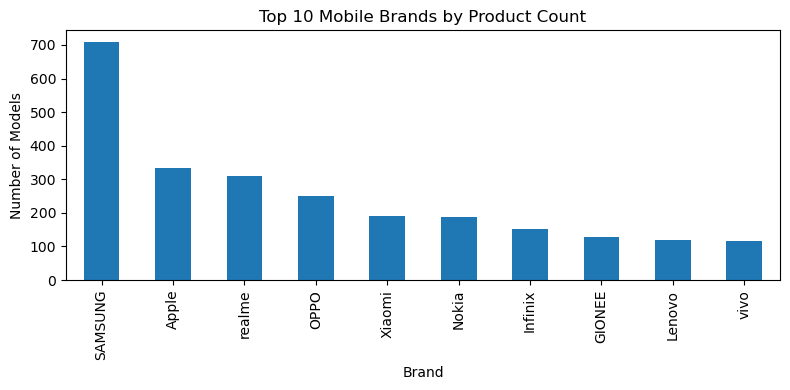

In [19]:
#BRAND ANALYSIS (VISUALIZATION)
brand_counts = df_final["brand"].value_counts().head(10)

plt.figure(figsize=(8,4))
brand_counts.plot(kind="bar")
plt.title("Top 10 Mobile Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.savefig("top_brands.png")
plt.show()


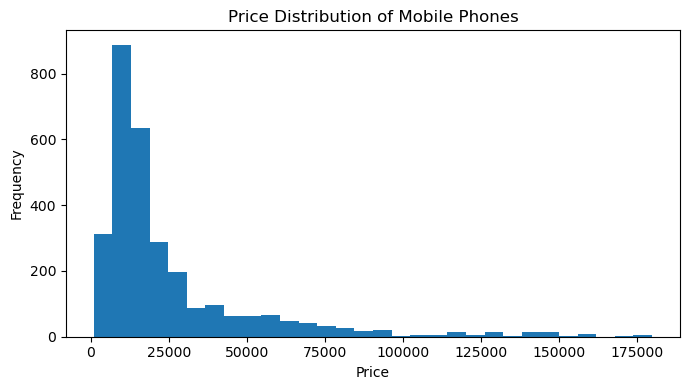

In [20]:
#PRICE DISTRIBUTION
plt.figure(figsize=(7,4))
df_final["selling_price"].plot(kind="hist", bins=30)
plt.title("Price Distribution of Mobile Phones")
plt.xlabel("Price")
plt.tight_layout()
plt.savefig("price_distribution.png")
plt.show()


In [21]:
#INTERACTIVE FILTERS
brand_input = "all"       # example: "Samsung" or "all"
price_input = "all"       # Budget / Mid-Range / Premium / all
min_rating = 4.0


In [22]:
#APPLY FILTERS
filtered = df_final.copy()

if brand_input.lower() != "all":
    filtered = filtered[filtered["brand"] == brand_input]

if price_input.lower() != "all":
    filtered = filtered[filtered["price_range"] == price_input]

filtered = filtered[filtered["rating"] >= min_rating]

filtered.shape


(2573, 11)

In [23]:
#TOP-10 RECOMMENDATIONS
top_10 = (
    filtered
    .sort_values(by="value_score", ascending=False)
    .head(10)
)

top_10[
    ["brand", "model", "rating",
     "selling_price", "discount_percent",
     "value_score"]
]


,brand,model,rating,selling_price,discount_percent,value_score
841,GIONEE,F103,4.0,4489,55.105511,0.049103
878,Nokia,105 DS 2020,4.2,1349,15.634772,0.048678
1635,SAMSUNG,Guru FM Plus SM-B110E/D,4.3,1448,12.823600,0.038081
882,Nokia,105 DS 2020,4.2,1399,12.507817,0.037550
849,GIONEE,Marathon M5 Plus,4.1,8499,69.753372,0.033650
1958,SAMSUNG,Galaxy Core Prime,4.1,5490,43.402062,0.032413
1018,Nokia,5,4.0,6999,50.676533,0.028962
348,LG,Stylus 2,4.1,8350,56.052632,0.027523
2279,Motorola,G4 Plus,4.0,6999,48.151715,0.027519
2114,Lenovo,K6 Note,4.1,7490,49.697784,0.027204


In [33]:
#USER INPUT
brand_input = input("Enter Brand (or all): ").strip().lower()
price_input = input("Enter Price Range (Budget / Mid-Range / Premium / all): ").strip().lower()
min_rating = float(input("Enter Minimum Rating (e.g. 4.0): "))
top_n = int(input("How many recommendations?: "))



Enter Brand (or all):  samsung
Enter Price Range (Budget / Mid-Range / Premium / all):  5000
Enter Minimum Rating (e.g. 4.0):  4.0
How many recommendations?:  2


In [34]:
#APPLY FILTERS
filtered = df_final.copy()

# Brand filter (case-insensitive)
if brand_input != "all":
    filtered = filtered[
        filtered["brand"].str.lower() == brand_input
    ]

# Price range filter
if price_input != "all":
    filtered = filtered[
        filtered["price_range"].str.lower() == price_input
    ]

# Rating filter
filtered = filtered[filtered["rating"] >= min_rating]

print("Filtered records:", filtered.shape[0])


Filtered records: 0


In [28]:
#TOP-N RECOMMENDATIONS
recommendations = (
    filtered
    .sort_values(by="value_score", ascending=False)
    .head(top_n)
)

recommendations[[
    "brand",
    "model",
    "selling_price",
    "rating",
    "discount_percent",
    "value_score"
]]


,brand,model,selling_price,rating,discount_percent,value_score


In [29]:
#BRAND SUMMARY (MISSING FIX)
brand_summary = (
    df_final.groupby("brand")
    .agg(
        product_count=("model", "count"),
        avg_price=("selling_price", "mean"),
        avg_rating=("rating", "mean")
    )
    .sort_values(by="product_count", ascending=False)
)

brand_summary.head()


,product_count,avg_price,avg_rating
brand,,,
SAMSUNG,708,24074.094633,4.208192
Apple,334,75310.514970,4.570060
realme,309,16608.093851,4.391586
OPPO,251,18485.812749,4.298406
Xiaomi,192,17065.734375,4.304688


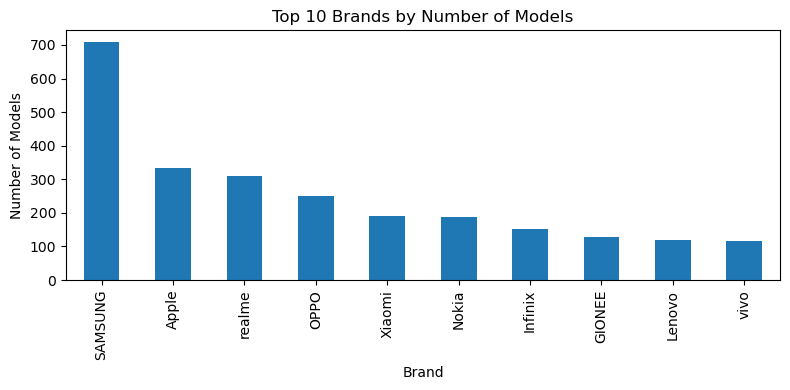

In [30]:
#BRAND ANALYSIS VISUALIZATION
plt.figure(figsize=(8,4))
brand_summary["product_count"].head(10).plot(kind="bar")
plt.title("Top 10 Brands by Number of Models")
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.savefig("brand_analysis.png")
plt.show()


In [31]:
#SAVE ALL OUTPUT FILES
df_final.to_csv("cleaned_flipkart_mobiles.csv", index=False)
brand_summary.to_csv("brand_analysis.csv")
recommendations.to_csv("top_recommendations.csv", index=False)

print("✅ Project execution completed successfully")


✅ Project execution completed successfully
